## Correlation Analysis
- [x] preprocess text data with `preprocess.py`
- The string length of the sentence has the highest correlation to the target variables (rho=0.69 to 0.77)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
with open('data/preprocessed.npy', 'rb') as fp:
    feats1 = np.load(fp)
    feats2 = np.load(fp)
    feats3 = np.load(fp)
    feats4 = np.load(fp)
    feats5 = np.load(fp)
    feats6 = np.load(fp)
    feats7 = np.load(fp)
    feats8 = np.load(fp)
    feats9 = np.load(fp)

In [3]:
(
    feats1.shape, feats2.shape, feats3.shape, feats4.shape, feats5.shape, 
    feats6.shape, feats7.shape, feats8.shape, feats9.shape
)

((1000, 384),
 (1000, 21),
 (1000, 16),
 (1000, 47),
 (1000, 3),
 (1000, 20),
 (1000, 6),
 (1000, 2),
 (1000, 4))

In [4]:
df = pd.read_csv("data/ratings.csv", encoding="ISO-8859-1")
texts = df["Sentence"].values
y1mos = df["MOS_Complexity"].values
y1std = df["Std_Complexity"].values
y2mos = df["MOS_Understandability"].values
y2std = df["Std_Understandability"].values
y3mos = df["MOS_Lexical_difficulty"].values
y3std = df["Std_Lexical_difficulty"].values

### Correlation Analysis

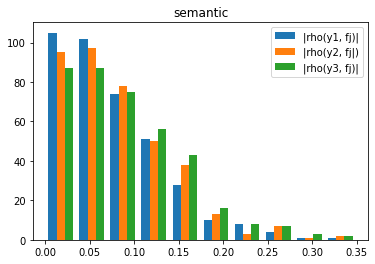

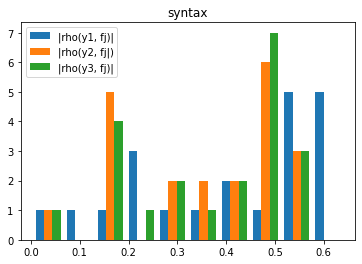

postags
[[0.17504826 0.15672624 0.17442311]
 [0.10636271 0.10527592 0.09271217]
 [0.02870676 0.00369217 0.00624791]
 [0.17368664 0.15037048 0.17379926]
 [0.16854591 0.15161913 0.16731293]
 [0.16570986 0.16444154 0.18067764]
 [0.05319105 0.01763713 0.02079693]
 [0.18532419 0.19886684 0.21127535]
 [0.05265528 0.08159079 0.0757634 ]
 [0.00734646 0.00498244 0.0131083 ]
 [0.27347934 0.25787565 0.30338503]
 [0.09844078 0.11133269 0.10334302]
 [0.19450892 0.18757626 0.18519335]
 [0.12328172 0.10083081 0.08941056]
 [0.2207906  0.17471303 0.20073815]
 [0.0098004  0.06994074 0.04158912]]


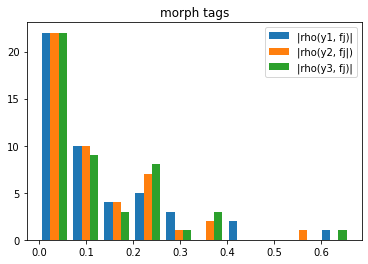

phonetics
[[0.09103139 0.07022718 0.114273  ]
 [0.08622417 0.0901495  0.11628594]
 [0.19604894 0.19036421 0.2061435 ]]


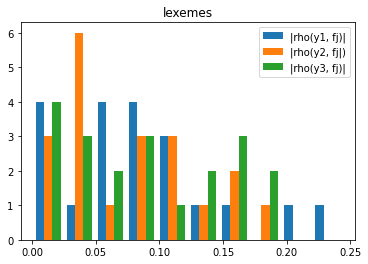

frequency
[[0.21362178 0.18897422 0.2021132 ]
 [0.19511018 0.23375691 0.23693177]
 [0.25011891 0.27922313 0.30232346]
 [0.17248898 0.12493845 0.16302114]
 [0.05676833 0.08421068 0.08260248]
 [0.13626813 0.1090488  0.14816521]]
lengths
[[0.72881714 0.59904206 0.62749281]
 [0.77741139 0.64936145 0.69009083]]
bigram
[[0.02145222 0.03659622 0.02510803]
 [0.14809974 0.15503517 0.17512458]
 [0.06580236 0.07294401 0.07399676]
 [0.09420528 0.11046113 0.13335005]]


In [5]:
def get_abs_corr(feats):
    tmp1, tmp2, tmp3 = [], [], []
    for j in range(feats.shape[1]):
        rho, _ = scipy.stats.pearsonr(y1mos, feats[:, j])
        tmp1.append(np.abs(rho))
        rho, _ = scipy.stats.pearsonr(y2mos, feats[:, j])
        tmp2.append(np.abs(rho))
        rho, _ = scipy.stats.pearsonr(y3mos, feats[:, j])
        tmp3.append(np.abs(rho))
    return np.c_[tmp1, tmp2, tmp3]

tmp = get_abs_corr(feats1)
plt.hist(tmp);
plt.legend(["|rho(y1, fj)|", "|rho(y2, fj|)", "|rho(y3, fj)|"]);
plt.title("semantic")
plt.show();

tmp = get_abs_corr(feats2)
plt.hist(tmp);
plt.legend(["|rho(y1, fj)|", "|rho(y2, fj|)", "|rho(y3, fj)|"]);
plt.title("syntax")
plt.show();

print("postags")
tmp = get_abs_corr(feats3)
print(tmp)

tmp = get_abs_corr(feats4)
plt.hist(tmp);
plt.legend(["|rho(y1, fj)|", "|rho(y2, fj|)", "|rho(y3, fj)|"]);
plt.title("morph tags")
plt.show();

print("phonetics")
tmp = get_abs_corr(feats5)
print(tmp)

tmp = get_abs_corr(feats6)
plt.hist(tmp);
plt.legend(["|rho(y1, fj)|", "|rho(y2, fj|)", "|rho(y3, fj)|"]);
plt.title("lexemes")
plt.show();

print("frequency")
tmp = get_abs_corr(feats7)
print(tmp)

print("lengths")
tmp = get_abs_corr(feats8)
print(tmp)

print("bigram")
tmp = get_abs_corr(feats9)
print(tmp)

In [6]:
(
    (feats1.sum(axis=0) == 0).sum(),
    (feats2.sum(axis=0) == 0).sum(),
    (feats3.sum(axis=0) == 0).sum(),
    (feats4.sum(axis=0) == 0).sum(),
    (feats5.sum(axis=0) == 0).sum(),
    (feats6.sum(axis=0) == 0).sum(),
    (feats7.sum(axis=0) == 0).sum(),
    (feats9.sum(axis=0) == 0).sum(),
    (feats9.sum(axis=0) == 0).sum(),
)

(0, 0, 0, 0, 0, 0, 0, 0, 0)

## PoS tags

In [7]:
# see https://universaldependencies.org/tagset-conversion/de-stts-uposf.html
TAGSET = [
    'ADJ', 
    'ADP', 
    'ADV', 
    'AUX', 
    'CCONJ', 
    'DET', 
    'INTJ', 
    'NOUN', 
    'NUM',
    'PART', 
    'PRON', 
    'PROPN', 
    'PUNCT', 
    'SCONJ', 
    # 'SYM',  # -ndbt/nid-
    'VERB', 
    'X'
]

In [8]:
# -ndbt/nid- = not detected by trankit, or not in dataset
# np.array(TAGSET)[feats3.sum(axis=0) == 0]

In [9]:
tmp = get_abs_corr(feats3)
tmp[np.isnan(tmp)] = 0.
avgrho = tmp.mean(axis=1)
idx = np.flipud(np.argsort(avgrho))
pd.DataFrame(index=[TAGSET[i] for i in idx], data=tmp[idx])

,0,1,2
PRON,0.273479,0.257876,0.303385
VERB,0.220791,0.174713,0.200738
NOUN,0.185324,0.198867,0.211275
PUNCT,0.194509,0.187576,0.185193
DET,0.165710,0.164442,0.180678
ADJ,0.175048,0.156726,0.174423
AUX,0.173687,0.150370,0.173799
CCONJ,0.168546,0.151619,0.167313
SCONJ,0.123282,0.100831,0.089411
PROPN,0.098441,0.111333,0.103343


## Other Morph. Tags

In [10]:
MORPHTAGS = [
    # punctuation type (3/11)
    "PunctType=Brck",  # `$(`
    "PunctType=Comm",  # `$,`
    "PunctType=Peri",  # `$.`
    # adposition type (3/4)
    "AdpType=Post",  # APPO
    "AdpType=Prep",  # APPR, APPRART
    "AdpType=Circ",  # APZR
    # particle type (3/6)
    "PartType=Res",  # PTKANT
    "PartType=Vbp",  # PTKVZ
    "PartType=Inf",  # PTKZU
    # pronominal type (8/11)
    "PronType=Art",  # APPRART, ART
    "PronType=Dem",  # PAV, PDAT, PDS
    "PronType=Ind",  # PIAT, PIDAT, PIS
    # "PronType=Neg",  # PIAT, PIDAT, PIS -ndbt/nid-
    # "PronType=Tot",  # PIAT, PIDAT, PIS -ndbt/nid-
    "PronType=Prs",  # PPER, PPOSAT, PPOSS, PRF
    "PronType=Rel",  # PRELAT, PRELS
    "PronType=Int",  # PWAT, PWAV, PWS
    # other related to STTS post tags
    # "AdjType=Pdt",  # PIDAT -ndbt/nid-
    "ConjType=Comp",  # KOKOM
    "Foreign=Yes",  # FM
    "Hyph=Yes",  # TRUNC
    "NumType=Card",  # CARD
    "Polarity=Neg",  # PTKNEG
    "Poss=Yes",  # PPOSAT, PPOSS
    "Reflex=Yes",  # PRF
    "Variant=Short",  # ADJD
    # verbs
    "VerbForm=Fin",  # VAFIN, VAIMP, VMFIN, VVFIN, VVIMP
    "VerbForm=Inf",  # VAINF, VVINF, VVIZU
    "VerbForm=Part",  # VAPP, VMPP, VVPP
    "Mood=Ind",  # VAFIN, VMFIN, VVFIN
    "Mood=Imp",  # VAIMP, VVIMP
    # "Mood=Sub",  # -ndbt/nid-
    "Aspect=Perf",  # VAPP, VMPP, VVPP
    "VerbType=Mod",  # VMPP
    # other syntax
    "Gender=Fem", 
    "Gender=Masc", 
    "Gender=Neut",
    "Number=Sing", 
    "Number=Plur",
    "Person=1", 
    "Person=2", 
    "Person=3",
    "Case=Nom", 
    "Case=Dat", 
    "Case=Gen", 
    "Case=Acc",
    # "Definite=Ind",  # -ndbt/nid-
    # "Definite=Def",  # -ndbt/nid-
    "Degree=Pos", 
    "Degree=Cmp", 
    "Degree=Sup",
    "Tense=Pres", 
    "Tense=Past", 
    # "Tense=Fut",  # -ndbt/nid-
    # "Tense=Imp",  # -ndbt/nid-
    # "Tense=Pqp",  # -ndbt/nid-
    # "Polite=",  # -ndbt/nid-  
]

In [11]:
# -ndbt/nid- = not detected by trankit, or not in dataset
# np.array(MORPHTAGS)[feats4.sum(axis=0) == 0]

end of sentence punctation (`PunctType=Peri`; rho=0.56 to 0.66; e.g., `. ? ! ; :`),

indicative mood (`Mood=Ind`; rho=.36 to .43), 

finite verbs (`VerbForm=Fin`; rho=.36 to .43), 

personal pronoun (`PronType=Prs`; rho=.32 to .35).

In [12]:
tmp = get_abs_corr(feats4)
tmp[np.isnan(tmp)] = 0.
avgrho = tmp.mean(axis=1)
idx = np.flipud(np.argsort(avgrho))
pd.DataFrame(index=[MORPHTAGS[i] for i in idx], data=tmp[idx])

,0,1,2
PunctType=Peri,0.661152,0.561428,0.602189
Mood=Ind,0.437591,0.364588,0.396269
VerbForm=Fin,0.435979,0.361566,0.394017
PronType=Prs,0.321240,0.314100,0.351656
Tense=Pres,0.272076,0.226517,0.264859
PunctType=Comm,0.269109,0.211911,0.236099
Person=3,0.235135,0.234116,0.244860
Case=Nom,0.239429,0.219235,0.239243
VerbType=Mod,0.216928,0.212982,0.259841
Person=1,0.217211,0.202837,0.232832
